# Tensorflow Regression Neural Network

## Libraries

In [30]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

## Data
Let's create some random data, in order to have a big dataset(1 milion instances)

In [4]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

y = mx + b

b = 5 

Let's create a dataframe

In [6]:
# Labels
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [10]:
my_data= pd.concat([x_df,y_df], axis=1)
my_data.head()

,X Data,Y
0,0.00000,3.998144
1,0.00001,4.766735
2,0.00002,1.715173
3,0.00003,6.017836
4,0.00004,5.181628


We created a dataframe so that we can plot them easily, since we have lot of points. Using the standard `plt.plot()` on one milion point can take too much time. In this way instead, we can randomly sample 250 points and plot them

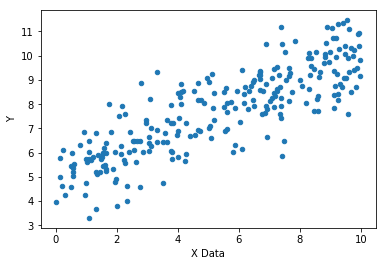

In [12]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [13]:
batch_size = 8

## Variables
Let's create the 2 variables we need and initialize them with two random numbers.

In [15]:
# m is our slope
m = tf.Variable(0.81)
b = tf.Variable(0.17)

## Placeholders

In [16]:
# X Data
x_ph = tf.placeholder(tf.float32, [batch_size])
# True Labels
y_ph = tf.placeholder(tf.float32, [batch_size])

## Operations

In [18]:
# Prediction
y_hat = m*x_ph + b

error = tf.reduce_sum(tf.square(y_ph-y_hat))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

## Session

In [24]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    batches=10000
    
    # We will feed 1000 batches each one of 8 points, grabbed in a random way
    for i in range(batches):
        
        # Grab 8 random points
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        # Feed dictionary
        feed = {x_ph: x_data[rand_ind], y_ph: y_true[rand_ind]}
        
        # Train Network
        sess.run(train, feed_dict = feed)
    
    # Let's grab our results
    model_m, model_b = sess.run([m,b])

In [25]:
model_m

0.53400767

In [26]:
model_b

5.0239706

## Plot

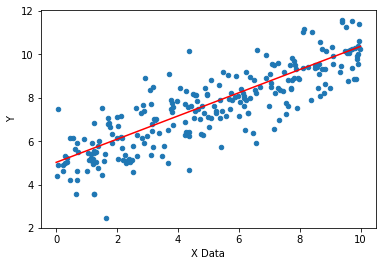

In [27]:
# Prediction
y_hat = x_data * model_m + model_b

my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

As we can see we obtained a good linear fit

# TF Estimator
The Tensorflow Estimator class is a high-level TensorFlow API that greatly simplifies machine learning programming. Estimators encapsulate the following actions:
- Training
- Evaluation
- Prediction
- Export for Serving


You may either use the pre-made Estimators we provide or write your own custom Estimators. All Estimators—whether pre-made or custom—are classes based on the `tf.estimator.Estimator` class.

In [28]:
# Create Features Column (only 1 feature in this case)
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [29]:
# Set up the estimator
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmplqfkpl_x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1445718d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Now we have created our Linear Regressor Estimator, it works like a sklearn estimator.
Let's use the sklearn `train_test_split` to create our train and test data set

## Train-Test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [34]:
print('Train data: ' + str(x_train.shape))
print('Test data: ' + str(x_test.shape))

Train data: (700000,)
Test data: (300000,)


## Input Functions

In [35]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [37]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8,
                                                      num_epochs=10000, shuffle= False)

In [38]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_test}, y_test, batch_size=8,
                                                      num_epochs=10000, shuffle= False)

## Step 1: Train the Estimator

In [39]:
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmplqfkpl_x/model.ckpt.
INFO:tensorflow:loss = 307.8069, step = 1
INFO:tensorflow:global_step/sec: 1054.78
INFO:tensorflow:loss = 26.492847, step = 101 (0.095 sec)
INFO:tensorflow:global_step/sec: 1443.38
INFO:tensorflow:loss = 4.034881, step = 201 (0.069 sec)
INFO:tensorflow:global_step/sec: 1280.28
INFO:tensorflow:loss = 25.328058, step = 301 (0.078 sec)
INFO:tensorf

As we can see we have trained our Linear Regressor Estimator, we can notice how the loss decrease, after each step.

In [40]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-05T14:23:22Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmplqfkpl_x/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-08-05-14:23:23
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.080742, global_step = 1000, label/

In [41]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-05T14:24:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmplqfkpl_x/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-08-05-14:24:21
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0600938, global_step = 1000, label/mean = 7.4803467, loss = 8.48075, prediction/mean = 7.367278
INFO:tensorflow:Saving 'c

In [42]:
print('TRAINING DATA METRICS:')
print(train_metrics)

TRAINING DATA METRICS:
{'average_loss': 1.080742, 'label/mean': 7.4745593, 'loss': 8.645936, 'prediction/mean': 7.3882885, 'global_step': 1000}


In [43]:
print('TEST DATA METRICS:')
print(test_metrics)

TEST DATA METRICS:
{'average_loss': 1.0600938, 'label/mean': 7.4803467, 'loss': 8.48075, 'prediction/mean': 7.367278, 'global_step': 1000}


## Is the model Overfitting?
By printing the Train and Test metrics, we can check if the model Overfits or not. In this specific case the train and test loss are very close, so we are not overfitting. We always expect the test loss to perform slightly worse than the training one.

## Predictions

In [44]:
# Create some new data that the model has never seen
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

# Let's cast the predictions into a list. Each element is a list
predictions = list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmplqfkpl_x/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [45]:
predictions

[{'predictions': array([4.479647], dtype=float32)},
 {'predictions': array([5.125721], dtype=float32)},
 {'predictions': array([5.7717953], dtype=float32)},
 {'predictions': array([6.4178686], dtype=float32)},
 {'predictions': array([7.063943], dtype=float32)},
 {'predictions': array([7.7100163], dtype=float32)},
 {'predictions': array([8.356091], dtype=float32)},
 {'predictions': array([9.002165], dtype=float32)},
 {'predictions': array([9.648239], dtype=float32)},
 {'predictions': array([10.294312], dtype=float32)}]

## Plot

In [46]:
predictions = []

# Let's put all the predictions into an array
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n6/q2m308wn7d3dr7m6xq0pnzrr0000gn/T/tmplqfkpl_x/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [47]:
predictions

[array([4.479647], dtype=float32),
 array([5.125721], dtype=float32),
 array([5.7717953], dtype=float32),
 array([6.4178686], dtype=float32),
 array([7.063943], dtype=float32),
 array([7.7100163], dtype=float32),
 array([8.356091], dtype=float32),
 array([9.002165], dtype=float32),
 array([9.648239], dtype=float32),
 array([10.294312], dtype=float32)]

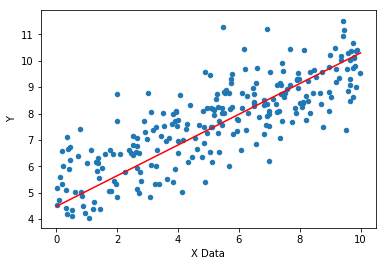

In [48]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r')

We have the same linear fit as before.